In [ ]:
import tensorflow_hub as hub

import os
import PIL
import PIL.Image

import pathlib

In [ ]:
# identical to: hub.load('https://tfhub.dev/google/aiy/vision/classifier/insects_V1/1')
# loaded_insect_model = tf.saved_model.load('./saved_models/insect')
# returns <tensorflow.python.trackable.autotrackable.AutoTrackable at 0x1f6539ea0>
# with callable concrete functions in loaded_insect_model.signatures


# identical to: hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/insects_V1/1')
loaded_insect_model = hub.KerasLayer('./saved_models/insect')
# wrapping concrete function loaded_insect_model._callable

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
# loaded_insect_model._callable.function_def

In [ ]:
jpgs = list(pathlib.Path('./assets/Romalea microptera/train').with_suffix('').glob('*.jpg'))
im = PIL.Image.open(str(jpgs[0]))

In [ ]:
im

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  './assets',
  seed=123,
  image_size=(224, 224),
  batch_size=1)

Found 1 files belonging to 1 classes.


In [ ]:
train_ds.class_names

['Romalea microptera']

In [ ]:
train_batches = []
label_batches = []

for image_batch, labels_batch in train_ds:
  train_batches.append(image_batch)
  label_batches.append(labels_batch)

In [ ]:
normalized_model = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255), loaded_insect_model])

In [ ]:
out = normalized_model.call(train_batches[0])

In [ ]:
_x = out.numpy()[0]

In [ ]:
np.argmax(_x)

898

In [ ]:
_x[np.argmax(_x)]

0.9779003

In [ ]:
# !tensorflowjs_converter \
#     --input_format=tf_saved_model \
#     --output_format=tfjs_graph_model \
#     --weight_shard_size_bytes 30000000 \
#     ./saved_models/insect \
#     ./saved_models/insect_web

Traceback (most recent call last):
  File "/Users/ngogober/mambaforge/envs/TF/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/Users/ngogober/mambaforge/envs/TF/lib/python3.10/site-packages/tensorflowjs/converters/converter.py", line 827, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/Users/ngogober/mambaforge/envs/TF/lib/python3.10/site-packages/tensorflowjs/converters/converter.py", line 831, in main
    convert(argv[0].split(' '))
  File "/Users/ngogober/mambaforge/envs/TF/lib/python3.10/site-packages/tensorflowjs/converters/converter.py", line 817, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/Users/ngogober/mambaforge/envs/TF/lib/python3.10/site-packages/tensorflowjs/converters/converter.py", line 528, in _dispatch_converter
    tf_saved_model_conversion_v2.convert_tf_saved_model(
  File "/Users/ngogober/mambaforge/envs/TF/lib/python3.10/site-packages/tensorflowjs/converters/tf_save

---

TickIDNet
- [github](https://github.com/lennijusten/TickIDNet)
- [paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0260622)

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import PIL
import PIL.Image

import pathlib

In [2]:

tick_model = hub.KerasLayer('./saved_models/ticknet')

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 32.00 GB
maxCacheSize: 3.99 GB



In [27]:
jpgs = list(pathlib.Path('./assets/ticks/').with_suffix('').glob('**/*.jpg'))
im = PIL.Image.open(str(jpgs[1]))

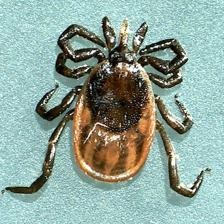

In [28]:
im

In [29]:
len(jpgs)

75

In [33]:
ds = tf.keras.utils.image_dataset_from_directory(
  './assets/ticks',
  seed=123,
  image_size=(224, 224),
  batch_size=1)

Found 75 files belonging to 3 classes.


In [34]:
ds.class_names

['A. americanum', 'D. variabilis', 'I. scapularis']

In [51]:
img_batches = []
label_batches = []

for img_batch, label_batch in ds:
  img_batches.append(img_batch)
  label_batches.append(label_batch)

In [63]:
out = tick_model.call(img_batches[0])

In [64]:
out

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[9.9815238e-01, 1.8474127e-03, 2.3564438e-07]], dtype=float32)>

In [65]:
_x = out.numpy()[0]

In [66]:
np.argmax(_x)

0

In [67]:
_x[np.argmax(_x)]

0.9981524

In [75]:
label_batches[0].numpy().tolist()[0]

0

In [77]:
!tensorflowjs_converter -h

usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tf_saved_model,tf_frozen_model,tf_hub,keras_saved_model,tfjs_layers_model,keras}]
                                       [--output_format {keras_saved_model,tfjs_graph_model,tfjs_layers_model,keras}]
                                       [--signature_name SIGNATURE_NAME]
                                       [--saved_model_tags SAVED_MODEL_TAGS]
                                       [--quantize_float16 [QUANTIZE_FLOAT16]]
                                       [--quantize_uint8 [QUANTIZE_UINT8]]
                                       [--quantize_uint16 [QUANTIZE_UINT16]]
                                       [--quantization_bytes {1,2}]
                                       [--split_weights_by_layer] [--version]
                                       [--skip_op_check]
                                       [--strip_debug_ops STRIP_DEBUG_OPS]
                                       [-

In [78]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --weight_shard_size_bytes 3_000_000 \
    ./saved_models/ticknet \
    ./saved_models/ticknet-web

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 32.00 GB
maxCacheSize: 3.99 GB

Writing weight file ./saved_models/ticknet-web/model.json...
